Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


Load the dataset

In [3]:
df = pd.read_csv("C:/Users/Windows 11/Downloads/movie dataset_2024.csv")  # change path if needed

df.head()


,Release Group,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year
0,Inside Out 2,1595983694,637852840,40.0,958130854,60.0,2024
1,Deadpool & Wolverine,1043180185,506937007,48.6,536243178,51.4,2024
2,Despicable Me 4,808537571,332583715,41.1,475953856,58.9,2024
3,Dune: Part Two,711844358,282144358,39.6,429700000,60.4,2024
4,Godzilla x Kong: The New Empire,567650016,196350016,34.6,371300000,65.4,2024


Basic Information

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Release Group     200 non-null    object 
 1   Worldwide         200 non-null    int64  
 2   Domestic          200 non-null    int64  
 3   Domestic_percent  200 non-null    float64
 4   Foreign           200 non-null    int64  
 5   Foreign_percent   200 non-null    float64
 6   year              200 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 11.1+ KB


In [5]:
df.describe()

,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year
count,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,200.000000,200.0
mean,5.603975e+07,2.330327e+07,28.793500,3.273647e+07,71.206000,2024.0
std,1.690567e+08,7.291482e+07,36.181713,9.836093e+07,36.182427,0.0
min,2.739320e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,2024.0
25%,3.926778e+06,0.000000e+00,0.000000,3.279578e+06,41.275000,2024.0
50%,8.515232e+06,0.000000e+00,0.000000,5.420353e+06,100.000000,2024.0
75%,2.809567e+07,1.006064e+07,58.725000,1.829751e+07,100.000000,2024.0
max,1.595984e+09,6.378528e+08,100.000000,9.581309e+08,100.000000,2024.0


In [6]:
df.isnull().sum()

Release Group       0
Worldwide           0
Domestic            0
Domestic_percent    0
Foreign             0
Foreign_percent     0
year                0
dtype: int64

Rename Columns

In [8]:
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

print(df.columns)


Index(['release_group', 'worldwide', 'domestic', 'domestic_percent', 'foreign',
       'foreign_percent', 'year'],
      dtype='object')


Data Cleaning

In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

# Convert columns to numeric safely
num_cols = [
    "worldwide",
    "domestic",
    "foreign",
    "domestic_percent",
    "foreign_percent",
    "year"
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill missing values
df["domestic"] = df["domestic"].fillna(0)
df["foreign"] = df["foreign"].fillna(0)

# Drop rows where worldwide collection is missing
df = df.dropna(subset=["worldwide"])

df.isnull().sum()

release_group       0
worldwide           0
domestic            0
domestic_percent    0
foreign             0
foreign_percent     0
year                0
dtype: int64

Top 10 Release Groups by Worldwide Collection

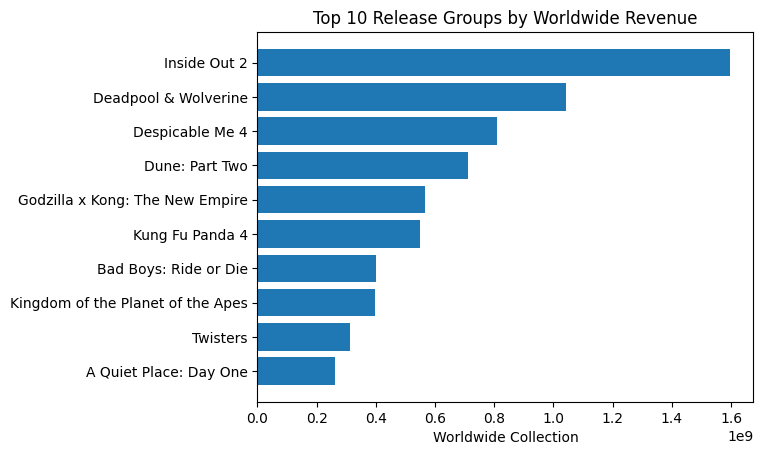

In [10]:
top10 = df.sort_values("worldwide", ascending=False).head(10)

plt.figure()
plt.barh(top10["release_group"], top10["worldwide"])
plt.xlabel("Worldwide Collection")
plt.title("Top 10 Release Groups by Worldwide Revenue")
plt.gca().invert_yaxis()
plt.show()

Year-wise Worldwide Revenue Trend

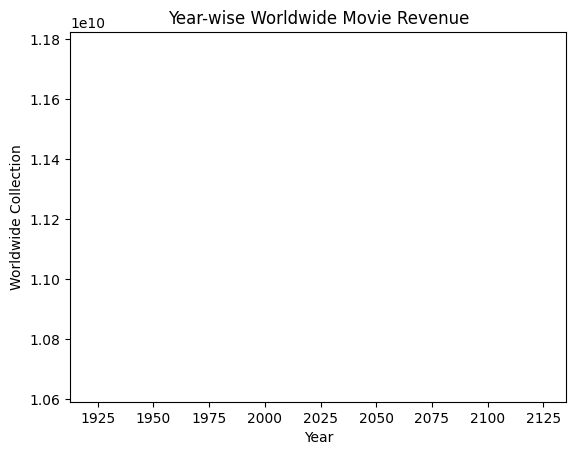

In [11]:
yearly_revenue = df.groupby("year")["worldwide"].sum()

plt.figure()
plt.plot(yearly_revenue.index, yearly_revenue.values)
plt.xlabel("Year")
plt.ylabel("Worldwide Collection")
plt.title("Year-wise Worldwide Movie Revenue")
plt.show()

Domestic vs Foreign Revenue

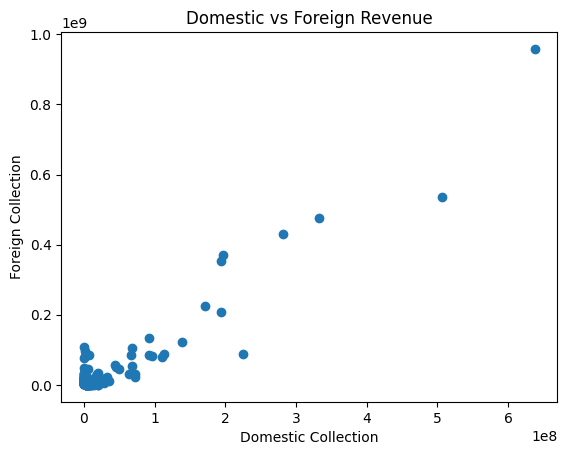

In [12]:
plt.figure()
plt.scatter(df["domestic"], df["foreign"])
plt.xlabel("Domestic Collection")
plt.ylabel("Foreign Collection")
plt.title("Domestic vs Foreign Revenue")
plt.show()

Revenue Distribution

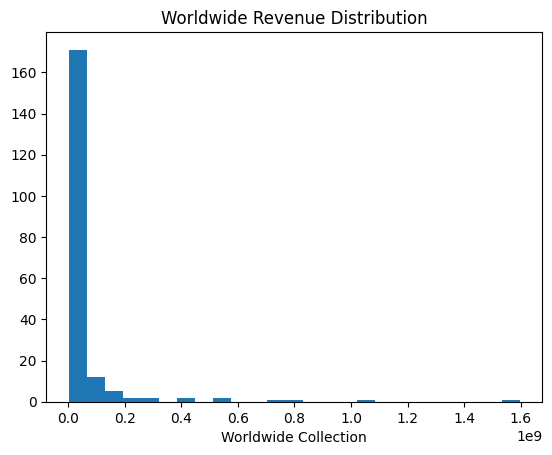

In [13]:
plt.figure()
plt.hist(df["worldwide"], bins=25)
plt.xlabel("Worldwide Collection")
plt.title("Worldwide Revenue Distribution")
plt.show()

Revenue Percentage Comparison

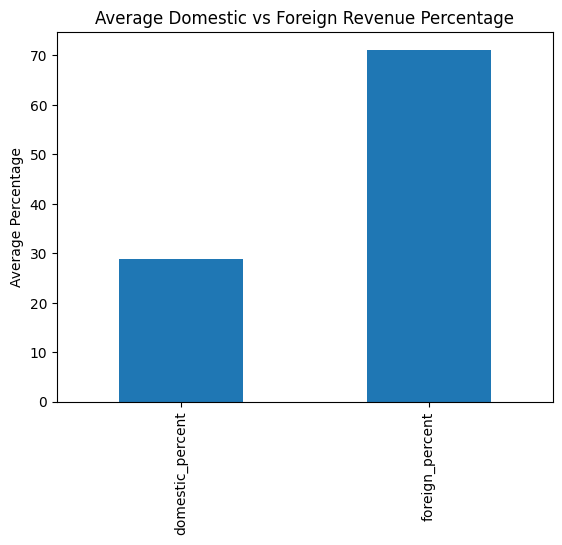

In [14]:
avg_percent = df[["domestic_percent", "foreign_percent"]].mean()

plt.figure()
avg_percent.plot(kind="bar")
plt.ylabel("Average Percentage")
plt.title("Average Domestic vs Foreign Revenue Percentage")
plt.show()

Correlation Heatmap

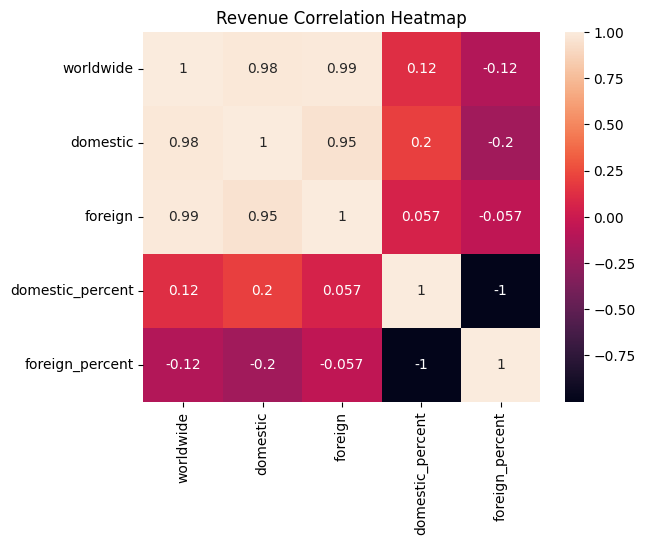

In [15]:
plt.figure()
sns.heatmap(
    df[["worldwide","domestic","foreign","domestic_percent","foreign_percent"]].corr(),
    annot=True
)
plt.title("Revenue Correlation Heatmap")
plt.show()

Conclusion :- This analysis highlights global box office performance based on domestic and foreign revenue contributions. It provides useful insights for distributors and producers to focus on international markets.
